In [1]:
# Customer Segmentation - create clusters of groups, some group tend to purchase more in that mall other group dont purchase much in that mall, build system to cluster these groups to get better
# insights and helps mall to make better buisness decsions and better marketing strategies

# this comes under unsupervised machine learning - no labeled outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshh21","key":"a2ae428b98ebadf82ed5c18961c17cd0"}'}

In [5]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.27MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('customer-segmentation-tutorial-in-python.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [22]:
# loading data from csv to pandas dataframe
customer_data = pd.read_csv('Mall_Customers.csv')

In [23]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [25]:
customer_data.shape

(200, 5)

In [26]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
customer_data.isnull().sum() # checking for any missing values

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [28]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
X = customer_data.iloc[:,[3,4]].values # taking only last 2 columns

In [30]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [32]:
# Choosing the number of clusters using WCSS -> Within clusters sum of squares
# Elbow Method!

# We have to find WCSS value for different clusters and choose the one with min value

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # init is intialization method improving choice of initial centroids
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

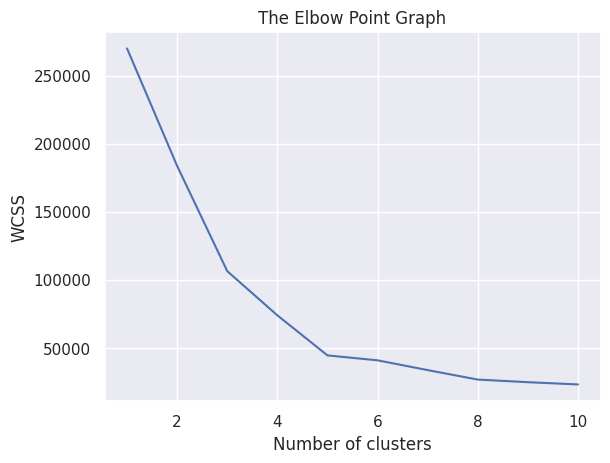

In [35]:
# Creating elbow graph to select number of clusters

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 2 elbow points 3,5

In [37]:
# Choosing number of clusters to be 5
# Training the model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X) # label for each of the clusters

print(Y) # cluster where the data point belongs to

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


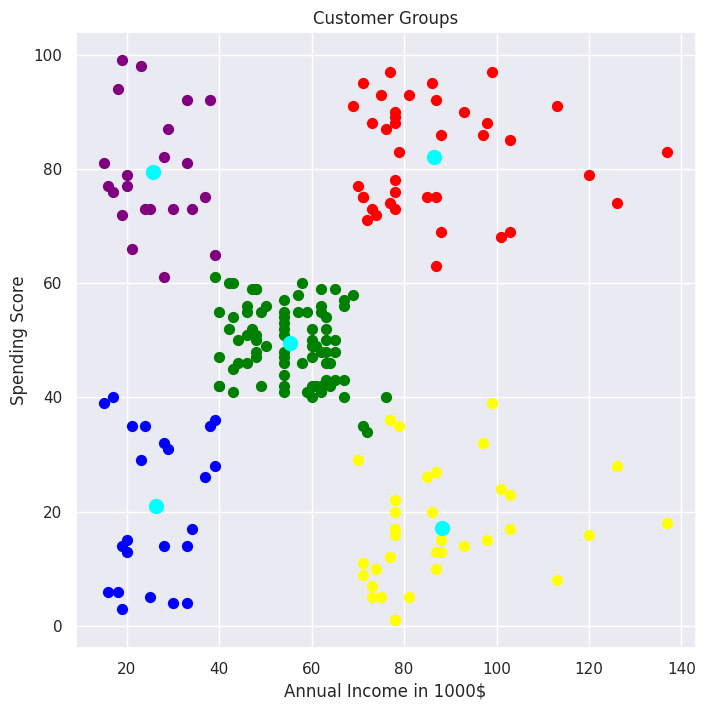

In [43]:
# Visualizing all the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1') # First part of X represents X axis and Second represents Y axis in X[Y==0,0]
#                                                                    second column in this represents feature column i.e annual income --> 0 and spending score --> 1
# Also first column in X[Y==0,0] represents cluster number
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
# The shape of this array is (k, 2) where k is the number of clusters, and 2 is the number of features
# [:, 0]: Selects the first feature (x-axis value) for all centroids.[:, 1]: Selects the second feature (y-axis value) for all centroids.

plt.title('Customer Groups')
plt.xlabel('Annual Income in 1000$')
plt.ylabel('Spending Score')
plt.show()